In [2]:
import numpy as np
import matplotlib.pyplot as plt

(15, 15)
<class 'numpy.ndarray'>
[[217 213 214 209 211 210 212 208 209 207 205 196 190 178 177]
 [211 212 214 215 211 209 207 208 209 202 195 201 193 179 165]
 [218 213 213 216 208 211 221 220 215 217 230 187 118 126 210]
 [183 185 174 175 194 200 203 205 224 224 190 133 135 111 151]
 [138 141 128 152 119 156 113 110 128 152 130 126  67 185 201]
 [174 161 185 136 135 164 167 137 116 119 139  95  81 167 137]
 [ 95  36 123 180 161 210  33  48 108  91 112  68 163 217 198]
 [178  85 108 181 128 114  99  52 152 125  88  61 181 146 132]
 [127 224 193  29 145 217 206 165 125 101  80  91 234 208 202]
 [154 224 221  28 237 214 157 109  68  97 175  44 184 158 136]
 [169 160  58  55  43 148 153 143  99  34 105 112 165 150 134]
 [103  75 138 137  91  48  84 130  94  85  27  63 145 167 118]
 [108  74  80  64  55  60  93 104  79  83  51  49 110 164  76]
 [142 127 133 119 114 120 130 133 125 120 126 124 176 164 165]
 [143 157 138 125 132 147 143 128 119 114 128 120 158 152 158]]


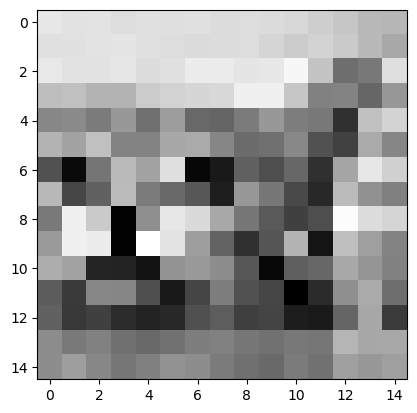

In [7]:
import cv2 as cv

pic_adress = 'cat_15by15.jpg'

pic = cv.imread (pic_adress)
pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
print (pic.shape)
print (type (pic))
print (pic [:,:])

plt.imshow (pic [:, :], cmap= 'gray')
plt.show ()

In [35]:
from numpy import mean

R22 = R33 = R44 = R55 = mean (mean (pic * pic))
R12 = R34 = R45 = mean ( mean (pic[: , 1:-1] * pic[: , 2:]))
R13 = mean (mean (pic[1:-1, 1:-1] * pic[2:, 2:]))
R14 = R23 = mean (mean (pic[1:-1 , :] * pic[2:, :]))
R15 = R24 = mean (mean (pic[2:, 1:-1] * pic[1:-1, 2:]))
R25 = mean (mean (pic[1:-1, 3:] * pic[2:, 1:-2]))
R35 = mean (mean (pic[:, 3:] * pic[:, 1:-2]))

Phi = np.array ([[R22, R23, R24, R25],
                 [R23, R22, R34, R35],
                 [R24, R34, R22, R45],
                 [R25, R35, R45, R22]])

R = np.array ([R12, R13, R14, R15])

aCoefs = np.matmul(np.linalg.inv(Phi) , R)

print ('Phi:')
print (Phi)
print ('R:')
print (R)
print ('aCoefs:')
print (aCoefs)

# Reconstruction?


''' NOTE: For reference only:
# xhad = [0 for i in range (1, len(x)+1)]

# for m in range (4, len(x)):
#     a_temp = np.array ([])
#     a_2 = 0
#     for j in range (4):
#         a_temp = (aCoefs[j] * x[m - j - 1])
#         a_2 += a_temp
#     xhad[m] = np.sum (a_2)
'''
print ()

Phi:
[[ 99.28444444 126.52820513 134.80473373 129.57051282]
 [126.52820513  99.28444444 128.20512821 121.05      ]
 [134.80473373 128.20512821  99.28444444 128.20512821]
 [129.57051282 121.05       128.20512821  99.28444444]]
R:
[128.20512821 121.         126.52820513 134.80473373]
aCoefs:
[ 0.29011786  0.49664158  0.36450544 -0.09705363]



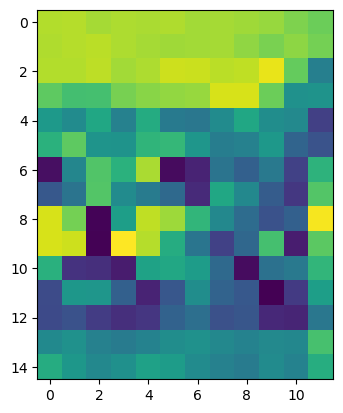

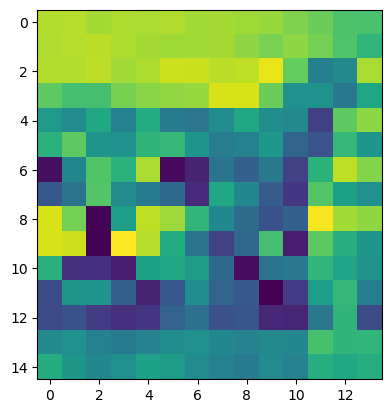

In [17]:
plt.imshow (pic [:, 1:-2])
plt.show ()
plt.imshow (pic [:, 1:])
plt.show ()